In [1]:
import numpy as np
import matplotlib.pyplot as plt

-Cars in Operation by Age, 1970, 2000, and 2013 (Table 3.09)

-Survival Rates or Cars and Light Trucks by Vehicle Age (Table 3.13)

-New Retail Vehicles Sales, 1970-2018 (Table 3.05)

Davis, Stacy C., and Robert G. Boundy. Transportation Energy Data Book: Edition 37.2. Oak Ridge National Laboratory, 2019, https://tedb.ornl.gov.

In [2]:
#cars only
#SUV, pickups, vans are categorized as trucks
#The market of passengar cars have been taken away by light trucks

#assume survival rate remains constant
#assume survival rate for vehicle age 30+ is 0
#assume normal distribution of vehicles ages 15+ (mu = 15, sigma = 4)

#age0 - 30
cars_2013_1 = np.array([9287,7700,5957,6159,5484,7226,7896,7706,7843,6924,7237,7167,6660,6889,5487,24457])#thousands
#age 0 - 30
survival_rate = np.array([1,0.997,0.994,0.991,0.984,0.974,0.961,0.942,0.920,0.893,0.862,0.826,0.798,0.718,0.613,0.510,0.415,0.332,0.261,0.203,0.157,0.120,0.092,0.070,0.053,0.040,0.030,0.023,0.013,0.010,0.007])
sales_years = np.arange(2013,2019)
car_sales = np.array([7586,7708,7517,6873,6081,5304])#thousands

In [3]:
def normal_distribution(x):
    term1 = 1/(sigma*np.sqrt(2*np.pi))
    term2 = np.exp(-0.5*((x-15)/sigma)**2)
    return term1*term2
sigma = 4
old_age = np.arange(15,31)
old_age_percent = normal_distribution(old_age)
cars_2013_15plus = cars_2013_1[-1]*old_age_percent
cars_2013 = np.concatenate((cars_2013_1[0:-1],cars_2013_15plus))
# cars_2013

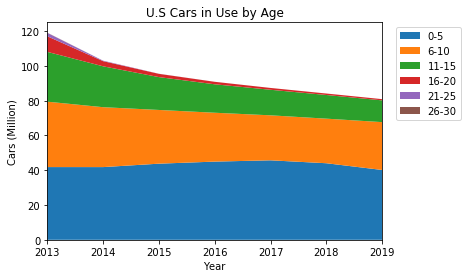

In [4]:
def survival(x,y):
    z = np.zeros(x.shape)
    n = len(z)
    for i in range(n-1):
        z[i+1] = x[i]
    z[0] = y
    return z*survival_rate
cars_2014 = survival(cars_2013,car_sales[0])
cars_2015 = survival(cars_2014,car_sales[1])
cars_2016 = survival(cars_2015,car_sales[2])
cars_2017 = survival(cars_2016,car_sales[3])
cars_2018 = survival(cars_2017,car_sales[4])
cars_2019 = survival(cars_2018,car_sales[5])

cars_total=np.vstack((cars_2013,cars_2014,cars_2015,cars_2016,cars_2017,cars_2018,cars_2019))

age_0_5 = np.sum(cars_total[:,0:6],1)/1000 #million
age_6_10 = np.sum(cars_total[:,6:11],1)/1000 #million
age_11_15 = np.sum(cars_total[:,11:16],1)/1000 #million
age_16_20 = np.sum(cars_total[:,16:21],1)/1000 #million
age_21_25 = np.sum(cars_total[:,21:26],1)/1000 #million
age_26_30 = np.sum(cars_total[:,26:-1],1)/1000 #million
years = np.arange(2013,2020)

labels = ["0-5","6-10","11-15","16-20","21-25","26-30"]
%matplotlib inline
plt.stackplot(years,age_0_5,age_6_10,age_11_15,age_16_20,age_21_25,age_26_30,labels = labels)
plt.legend(bbox_to_anchor = [1.25,1])
plt.title("U.S Cars in Use by Age")
plt.xlabel("Year")
plt.ylabel("Cars (Million)")
plt.xlim(2013,2019)
plt.show()

In [5]:
import pandas as pd
data = pd.DataFrame(cars_total)

pd.set_option('display.max_columns', 40)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,9287.0,7700.000,5957.000000,6159.000000,5484.000000,7226.000000,7896.000000,7706.000000,7843.000000,6924.000000,7237.000000,7167.000000,6660.000000,6889.000000,5487.000000,2439.232838,2364.185533,2152.615424,1841.229545,1479.469502,1116.762170,791.902959,527.521097,330.114267,194.064166,107.172411,55.600315,27.097429,1.240611e+01,5.335800e+00,2.155858e+00
1,7586.0,9259.139,7653.800000,5903.387000,6060.456000,5341.416000,6944.186000,7438.032000,7089.520000,7003.799000,5968.488000,5977.762000,5719.266000,4781.880000,4222.957000,2798.370000,1012.281628,784.909597,561.832626,373.769598,232.276712,134.011460,72.855072,36.926477,17.496056,7.762567,3.215172,1.278807,3.522666e-01,1.240611e-01,3.735060e-02
2,7708.0,7563.242,9203.584166,7584.915800,5808.932808,5902.884144,5133.100776,6541.423212,6842.989440,6330.941360,6037.274738,4929.971088,4770.254076,4106.432988,2931.292440,2153.708070,1161.323550,336.077500,204.861405,114.052023,58.681827,27.873205,12.329054,5.099855,1.957103,0.699842,0.232877,0.073949,1.662449e-02,3.522666e-03,8.684275e-04
3,7517.0,7684.876,7517.862548,9120.751909,7463.557147,5657.900555,5672.671662,4835.380931,6018.109355,6110.789570,5457.271452,4986.788934,3934.116928,3425.042427,2517.243422,1494.959144,893.788849,385.559419,87.716228,41.586865,17.906168,7.041819,2.564335,0.863034,0.270292,0.078284,0.020995,0.005356,9.613365e-04,1.662449e-04,2.465866e-05
4,6873.0,7494.449,7638.766744,7450.201785,8974.819878,7269.504661,5437.242433,5343.656706,4448.550457,5374.171654,5267.500609,4507.706220,3979.457569,2824.695954,2099.551007,1283.794145,620.408045,296.737898,100.631008,17.806394,6.529138,2.148740,0.647847,0.179503,0.045741,0.010812,0.002349,0.000483,6.963022e-05,9.613365e-06,1.163715e-06
5,6081.0,6852.381,7449.482306,7570.017843,7330.998557,8741.474561,6985.993980,5121.882372,4916.164169,3972.555558,4632.535966,4350.955503,3597.149563,2857.250535,1731.538620,1070.771014,532.774570,205.975471,77.448591,20.428095,2.795604,0.783497,0.197684,0.045349,0.009514,0.001830,0.000324,0.000054,6.277585e-06,6.963022e-07,6.729356e-08
6,5304.0,6062.757,6811.266714,7382.436965,7448.897558,7140.392594,8400.557053,6580.806329,4712.131782,4390.134603,3424.342891,3826.474708,3472.062492,2582.753386,1751.494578,883.084696,444.369971,176.881157,53.759598,15.722064,3.207211,0.335472,0.072082,0.013838,0.002404,0.000381,0.000055,0.000007,7.022087e-07,6.277585e-08,4.874116e-09


Sales projection using Gaussian process regression (ML)

In [6]:
#training data 
vehicle_sale = np.array([8399,10242,10941,11424,8853,8486,9957,11004,11107,
10512,8949,8488,7956,9148,10324,10979,11404,10187,10544,9776,9301,8185,8213,
8518,8991,8620,8479,8217,8085,8638,8778,8352,8042,7556,7483,7660,7762,7562,
6769,5402,5636,6093,7245,7586,7708,7517,6873,6080,5304])

sale_years = np.array([1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,
1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,
1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,
2013,2014,2015,2016,2017,2018])

In [7]:
#test data with gdp projection data relation to car sale from eia
vehicle_sale2 = np.array([8399,10242,10941,11424,8853,8486,9957,11004,11107,
10512,8949,8488,7956,9148,10324,10979,11404,10187,10544,9776,9301,8185,8213,
8518,8991,8620,8479,8217,8085,8638,8778,8352,8042,7556,7483,7660,7762,7562,
6769,5402,5636,6093,7245,7586,7708,7517,6873,6080,5304,5455,5394,5519]) 

sale_years2 = np.array([1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,
1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,
1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,
2013,2014,2015,2016,2017,2018,2020,2024,2030])

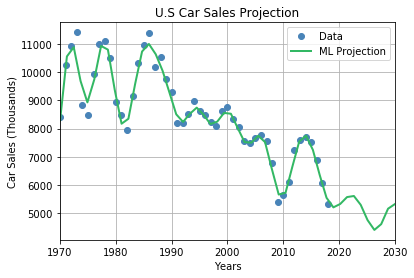

In [8]:
###HYPER PARAMETERS###
sigma_f = 1
lam = 2.5
sigma_n = 0.2
#######

X = sale_years2
y = vehicle_sale2

xp = np.linspace(1970,2030)

K1 = sigma_f * np.exp(-(X[None, :] - X[:, None])**2 / (2 * lam**2)) + sigma_n**2 * np.eye(len(y))
Kp = sigma_f * np.exp(-(X[None, :] - xp[:, None])**2 / (2 * lam**2))

yp = Kp @ np.linalg.inv(K1) @ y


plt.plot(sale_years,vehicle_sale,'o',label = "Data",color = '#4984b8')
plt.plot(xp,yp,linewidth = 2, label = "ML Projection",color = '#33b864')
plt.title("U.S Car Sales Projection")
plt.xlabel("Years")
plt.ylabel("Car Sales (Thousands)")
plt.xlim(1970,2030)
plt.grid()
plt.legend()
plt.show()

In [9]:
project_years = np.arange(2018,2030)
Kp2 = sigma_f * np.exp(-(X[None, :] - project_years[:, None])**2 / (2 * lam**2))
car_sales2 = Kp2 @ np.linalg.inv(K1) @ y

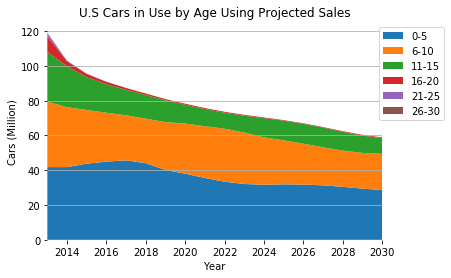

In [10]:
# plt.style.use("fivethirtyeight")
cars_2020 = survival(cars_2019,car_sales2[0])
cars_2021 = survival(cars_2020,car_sales2[1])
cars_2022 = survival(cars_2021,car_sales2[2])
cars_2023 = survival(cars_2022,car_sales2[3])
cars_2024 = survival(cars_2023,car_sales2[4])
cars_2025 = survival(cars_2024,car_sales2[5])
cars_2026 = survival(cars_2025,car_sales2[6])
cars_2027 = survival(cars_2026,car_sales2[7])
cars_2028 = survival(cars_2027,car_sales2[8])
cars_2029 = survival(cars_2028,car_sales2[9])
cars_2030 = survival(cars_2029,car_sales2[10])

cars_total2=np.vstack((cars_2013,cars_2014,cars_2015,cars_2016,cars_2017,cars_2018,cars_2019,cars_2020,cars_2021,cars_2022,cars_2023,cars_2024,cars_2025,cars_2026,cars_2027,cars_2028,cars_2029,cars_2030))

age_0_5 = np.sum(cars_total2[:,0:6],1)/1000 #million
age_6_10 = np.sum(cars_total2[:,6:11],1)/1000 #million
age_11_15 = np.sum(cars_total2[:,11:16],1)/1000 #million
age_16_20 = np.sum(cars_total2[:,16:21],1)/1000 #million
age_21_25 = np.sum(cars_total2[:,21:26],1)/1000 #million
age_26_30 = np.sum(cars_total2[:,26:-1],1)/1000 #million
years = np.arange(2013,2031)

labels = ["0-5","6-10","11-15","16-20","21-25","26-30"]
%matplotlib inline
plt.stackplot(years,age_0_5,age_6_10,age_11_15,age_16_20,age_21_25,age_26_30,labels = labels)
plt.legend(bbox_to_anchor = [1.20,1])
plt.title("U.S Cars in Use by Age Using Projected Sales")
plt.xlabel("Year")
plt.ylabel("Cars (Million)")
plt.grid(axis = "y")
plt.xlim(2013,2030)
plt.box()
plt.show()